In [1]:
import numpy as np

from sltns.data._data import generate_simulated_data
from sltns.discrepency._disc import get_dbars
from sltns.optimization._opt import altmin
from sltns.plots._plots import (
    plot_discrepancy_and_means,
    plot_label_distributions_over_time,
    plot_results,
    plot_multiple_results,
)

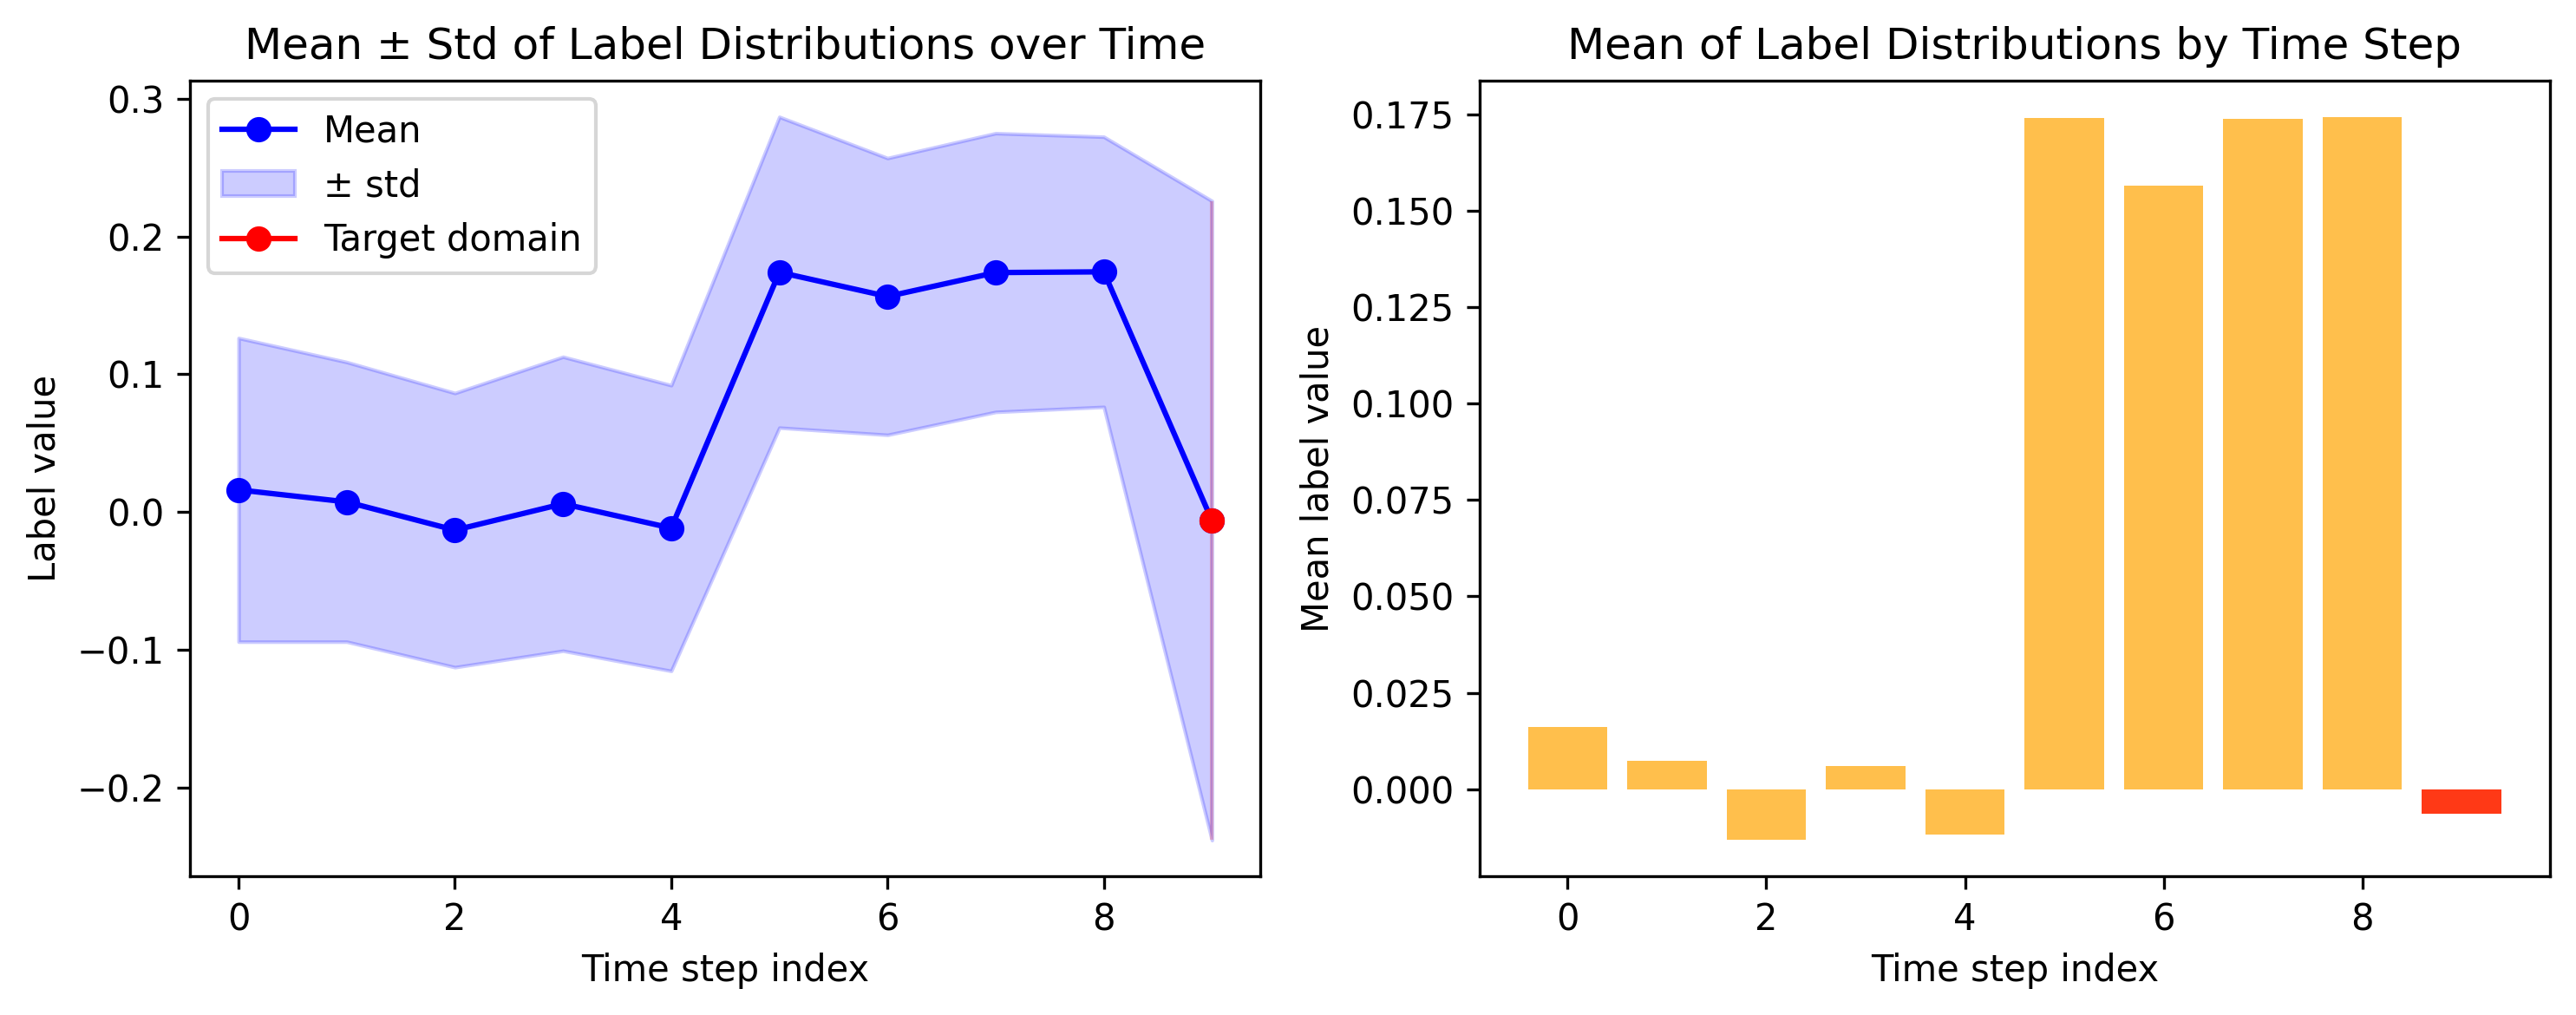

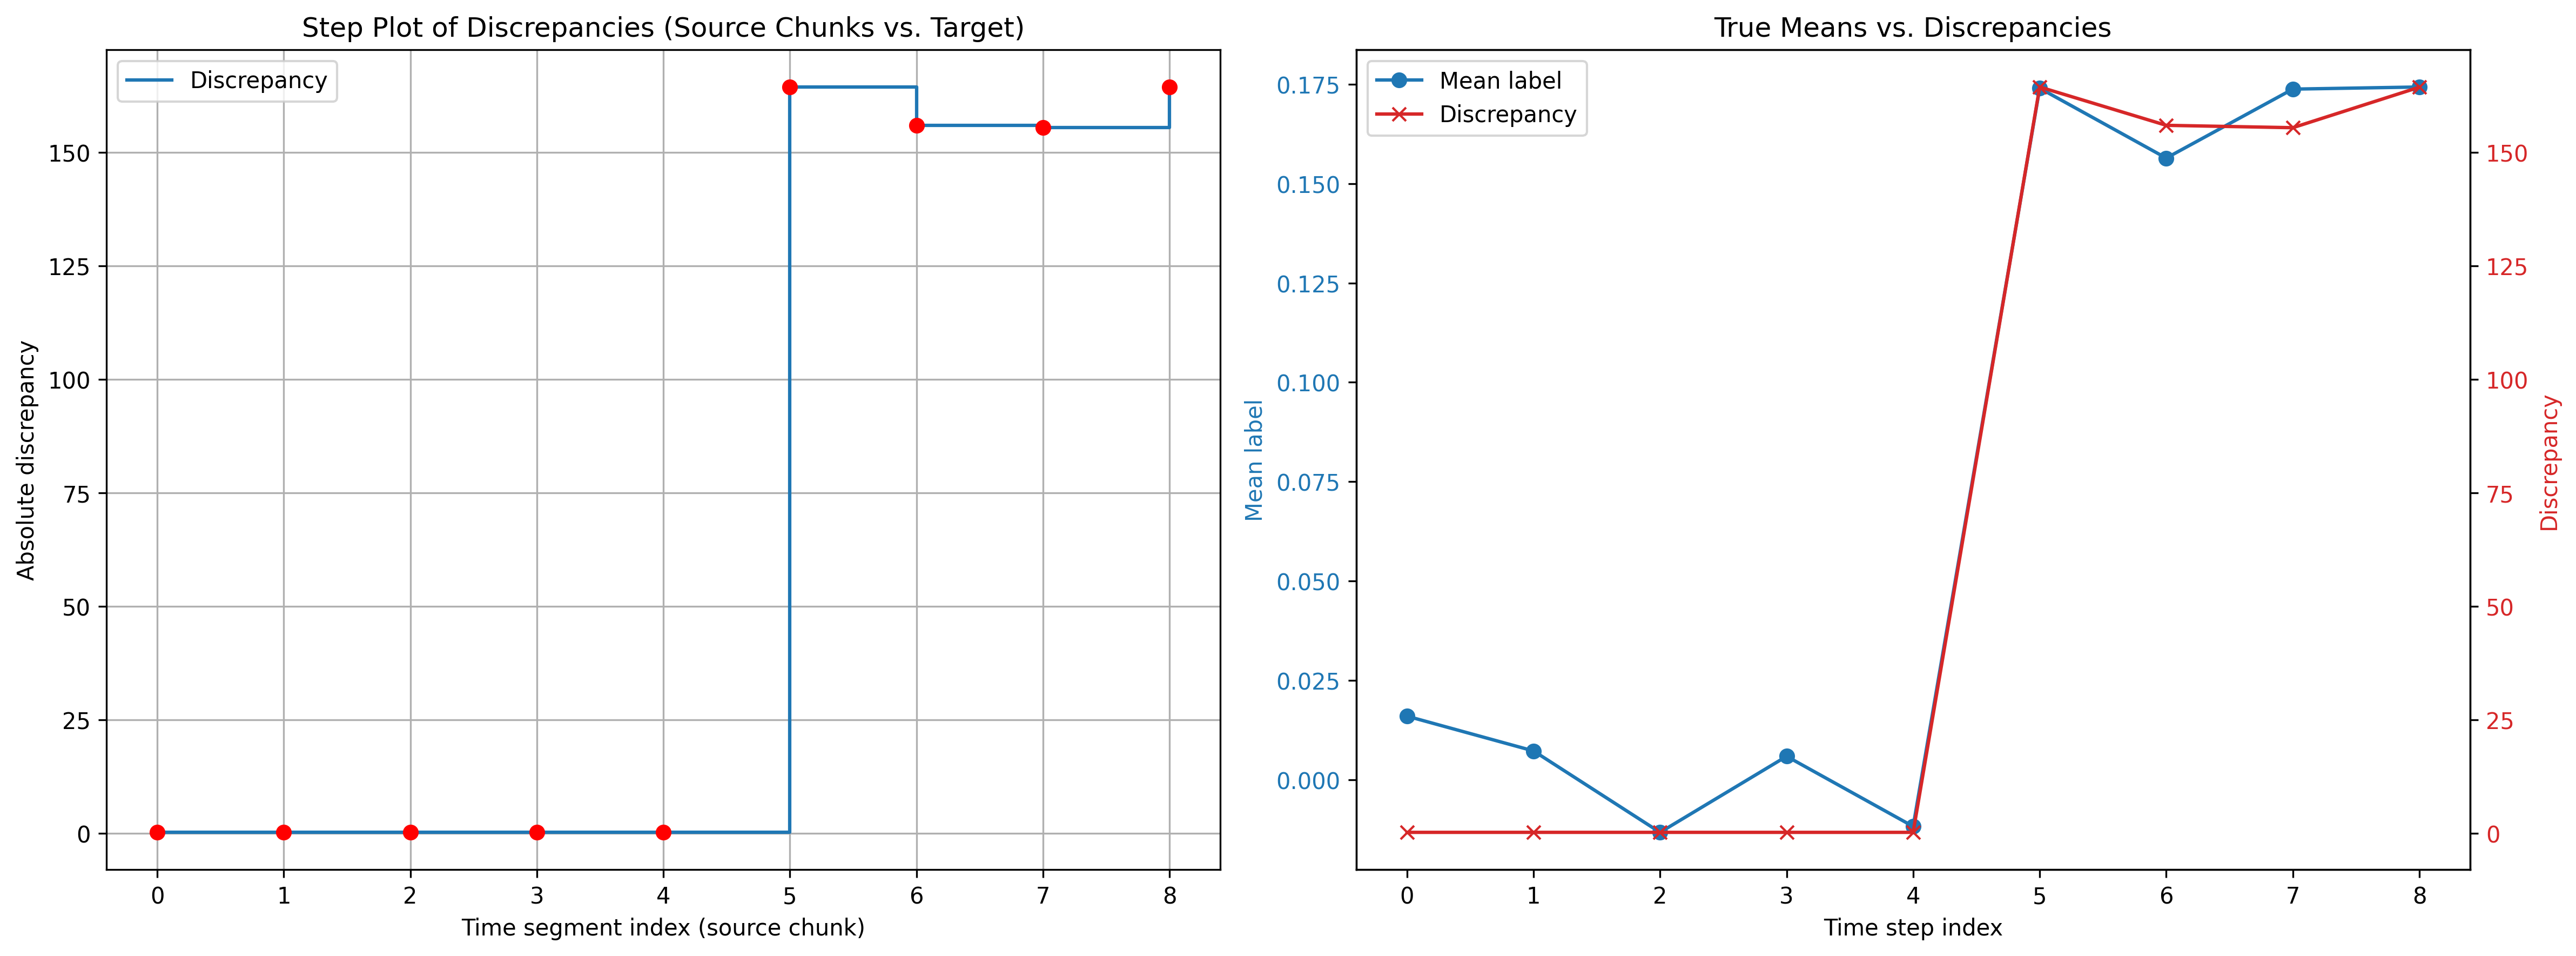

In [2]:
rng = np.random.default_rng(42)

# Now create T=9 sources + 1 target = 10 distributions total
ms = [100] * 10  # length = 10 => T=9
feature_means = [0.0] * 5 + [4.0] * 4 + [0.0]
standard_devs = [0.01] * 5 + [0.02] * 4 + [0.2]
w_dists_from_trgt = [1 / 9] * 9

(xs, ys, xt, yt, x_test, y_test, x_val, y_val, x_chunks, y_chunks) = (
    generate_simulated_data(
        d=10,
        ms=ms,
        eps1=standard_devs,
        eps2=w_dists_from_trgt,
        rng=rng,
        alpha=1.0,
        sigma=0.1,
        feature_means=feature_means,
        beta_mixing=False,
        beta_value=0.6,
    )
)

plot_label_distributions_over_time(y_chunks=y_chunks, target_chunk=yt)

dbars = get_dbars(xs=xs, ys=ys, xt=xt, yt=yt, ms=ms, rng=rng)

means = [chunk.mean() for chunk in y_chunks]  # length 9
plot_discrepancy_and_means(dbars=dbars, means=means)

Calling altmin
Current objective value: [68.7019768]
Current objective value: [6.63551543]
Current objective value: [2.4333726]
Current objective value: [2.39628106]
Current objective value: [2.36249918]
Current objective value: [2.33173162]
Current objective value: [2.30370939]
Current objective value: [2.27818749]
test error = 0.04805117103531149
Calling altmin
Current objective value: [68.70681749]
Current objective value: [6.63641461]
Current objective value: [2.43351034]
Current objective value: [2.39642364]
Current objective value: [2.36264669]
Current objective value: [2.33188415]
Current objective value: [2.30386703]
Current objective value: [2.27835034]
test error = 0.04857277095147132
Calling altmin
Current objective value: [68.69785028]
Current objective value: [6.62764801]
Current objective value: [2.42607643]
Current objective value: [2.38891074]
Current objective value: [2.35505834]
Current objective value: [2.32422423]
Current objective value: [2.2961396]
Current objecti

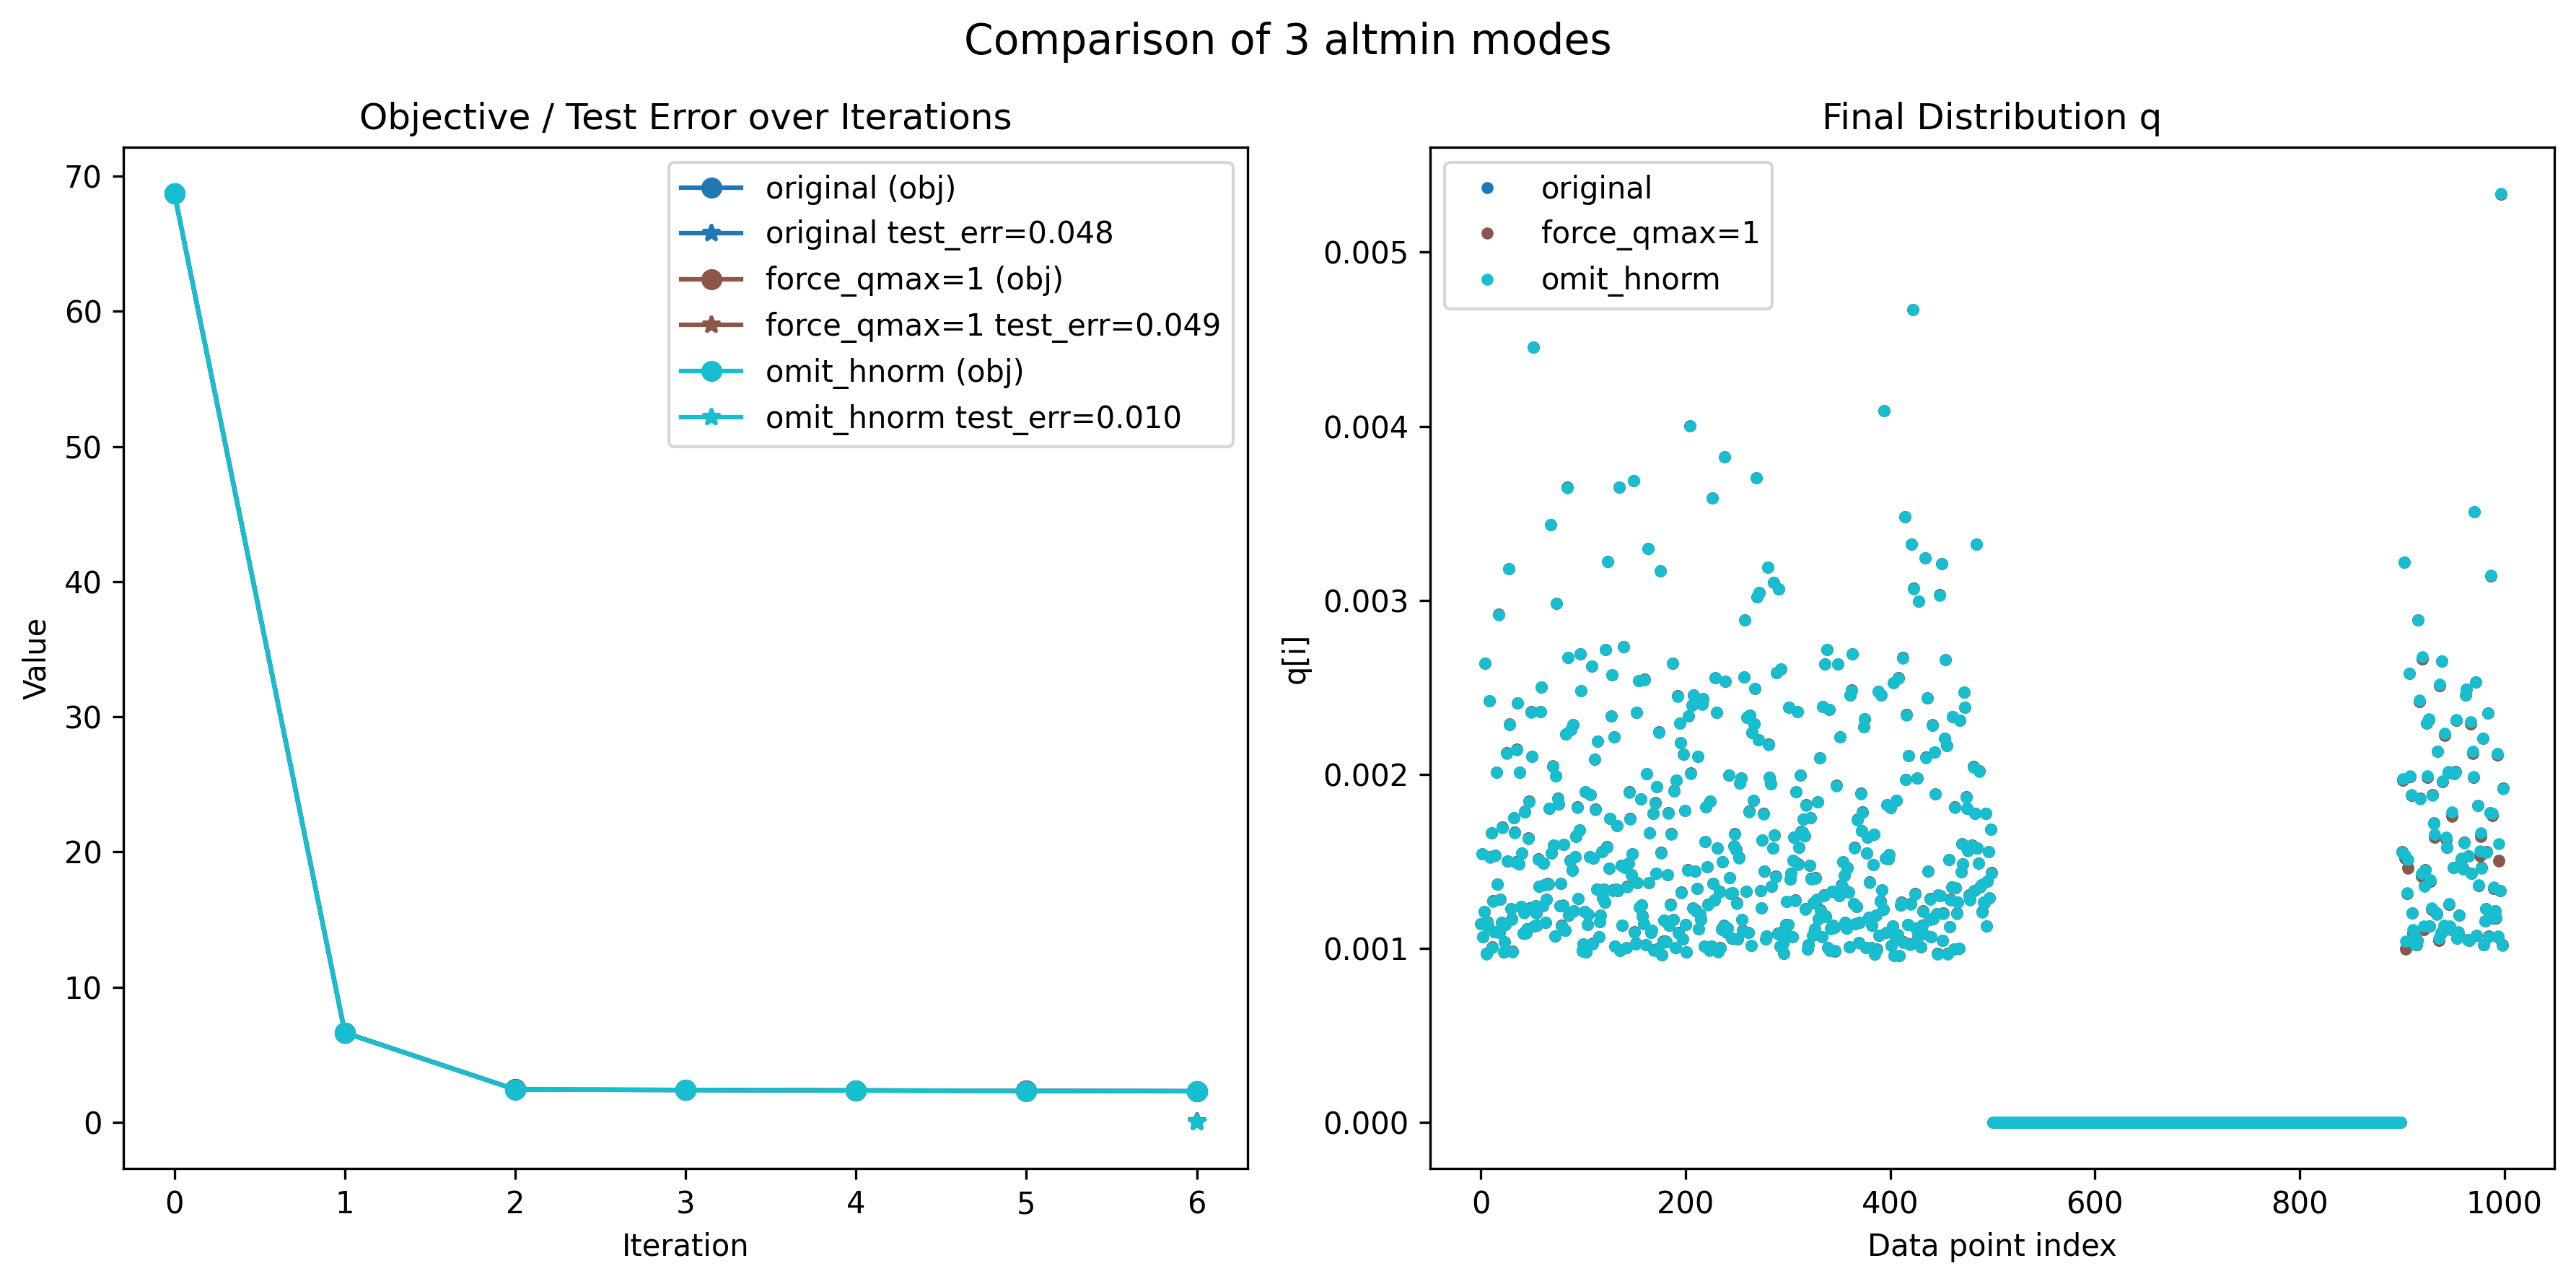

In [5]:
lambda_1 = 100
lambda_2 = 0.1
lambda_3 = 1000
lr = 0.01

m = xs.shape[0]
n = xt.shape[0]
p0 = np.zeros(m + n)
p0[m : m + n] = 1.0
p0 /= np.sum(p0)

# 6) Run altmin
test_err_orig, q_orig, objs_orig = altmin(
    xs,
    xt,
    ys,
    yt,
    x_test,
    y_test,
    x_val,
    y_val,
    lambda_1,
    lambda_2,
    lambda_3,
    dbars,
    p0,
    lr,
    ms,
    maxiters=100,
    niters=1000,
    q_init=None,
    tol=0.5,
    hnorm_mode="original",
)

test_err_force, q_force, objs_force = altmin(
    xs,
    xt,
    ys,
    yt,
    x_test,
    y_test,
    x_val,
    y_val,
    lambda_1,
    lambda_2,
    lambda_3,
    dbars,
    p0,
    lr,
    ms,
    maxiters=100,
    niters=1000,
    q_init=None,
    tol=0.5,
    hnorm_mode="force_qmax=1",
)

test_err_omit, q_omit, objs_omit = altmin(
    xs,
    xt,
    ys,
    yt,
    x_test,
    y_test,
    x_val,
    y_val,
    lambda_1,
    lambda_2,
    lambda_3,
    dbars,
    p0,
    lr,
    ms,
    maxiters=100,
    niters=1000,
    q_init=None,
    tol=0.5,
    hnorm_mode="omit_hnorm",
)


all_runs = [
    {"label": "original", "objs": objs_orig, "test_error": test_err_orig, "q": q_orig},
    {
        "label": "force_qmax=1",
        "objs": objs_force,
        "test_error": test_err_force,
        "q": q_force,
    },
    {
        "label": "omit_hnorm",
        "objs": objs_omit,
        "test_error": test_err_omit,
        "q": q_omit,
    },
]

# Now plot them all in one figure:
plot_multiple_results(all_runs, title="Comparison of 3 altmin modes")

In [4]:
lambda_1 = 100
lambda_2 = 0.1
lambda_3 = 1000
lr = 0.01

m = xs.shape[0]
n = xt.shape[0]
p0 = np.zeros(m + n)
p0[m : m + n] = 1.0
p0 /= np.sum(p0)

# 6) Run altmin
# test_error, q, losses = altmin(
#    xs, xt, ys, yt,
#    x_test, y_test,
#    x_val, y_val,
#    lambda_1, lambda_2, lambda_3,
#    dbars, p0, lr, ms,
#    maxiters=100, niters=1000,
#    q_init=None, tol=0.5
# )
# print("Final test error:", test_error)

# plot_results(q=q, objs=losses, test_errs=test_error)